## 혼자 공부하는 머신러닝 + 딥러닝(01, 03, 02-01, 02-02) 자료 활용
data : https://gist.github.com/rickiepark


우리가 머신러닝 엔지니어로 회사에 채용 되었다고 가정하고, 회사 업무를 진행!

### 1. 첫번째 과제(생선 분류)

1. 마켓에서 살아있는 생선을 판매 시작
2. 고객이 온라인으로 주문하면 가장 빠른 물류 센터에서 신선한 생선을 곧배로 배송

> 한가지 문제가 발생
> - 물류센터 직원이 생선 구분을 잘 못함

> 따라서, 생선이름을 자동으로 알려주는 머신러닝 모델 요구

- 생선은 "도미", "곤들매기", "농어", "강꼬치고기", "로치", "빙어", "송어"
- 생선 분류 문제

> 어떻게 생선을 분류할 수 있을까
> 생선의 특징을 알면 구분하기 쉬움(예시 : 고양이, 강아지)

In [ ]:
# 생선의 특징을 알면 구분하기 쉬움

# 생선의 길이가 30cm이상이면 도미!
# 하지만, 특징 1개로는 분류하기가 쉽지 않음
# 특징을 여러개!!!, 길이, 무게

1.1 도미데이터 준비하기

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
print(type(bream_length))
print(type(bream_weight))

<class 'list'>
<class 'list'>


In [ ]:
print(len(bream_length))
print(len(bream_weight))

35
35


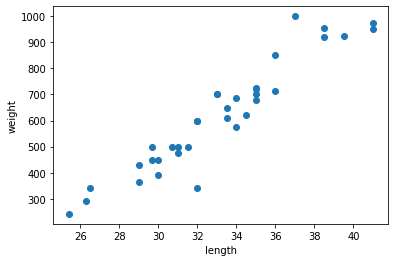

In [ ]:
import matplotlib.pyplot as plt # 그래프를 그릴 때 쓰는 모델

plt.scatter(bream_length, bream_weight) # scatter : 산점도
plt.xlabel("length")  # x축의 label을 결정
plt.ylabel("weight")  # y축의 label을 결정
plt.show()  # 그래프를 그려주는 코드

### 1.2 빙어 데이터 준비하기


In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
print(len(smelt_length))
print(len(smelt_weight))

14
14


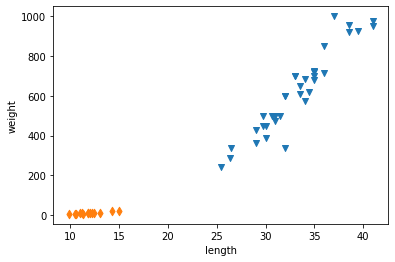

In [ ]:
# 주황색 : 빙어 , 파란색 : 도미

plt.scatter(bream_length, bream_weight, marker="v") # scatter : 산점도
plt.scatter(smelt_length, smelt_weight, marker="d")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

머신러닝 학습과정

- 분류모델 : 지도학습

  학습할 때 데이터 : x_train(특징데이터), y_train(정답)

  

### 1.3 데이터 전처리
- 생선분류 모델 : 지도학습 => 정답이 반드시 필요

학습에 필요한 데이터
1. x_train : 특징 데이터, 반드시 1쌍
1. y_train : 정답 데이터(도미인지, 빙어인지)

In [ ]:
# 도미와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_length

In [ ]:
# 확인해 보기
print(len(length))
print(len(weight))

print(length)
print(weight)

49
49
[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [ ]:
# 도미와 빙어데이터의 길이와 무게 짝 맞추기 => 리스트로 빼오기
# [길이, 무게]
# fish_data = list(map(list, zip(length, weight)))
import numpy as np

fish_data = [[l,w] for l, w in zip(length, weight)]  # 리스트 내포
print(np.shape(fish_data)) # 모양 확인하기
print(fish_data)

(49, 2)
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 9.8], [10.5, 10.5], [10.6, 10.6], [11.0, 11.0], [11.2, 11.2], [11.3, 11.3], [11.8, 11.8], [11.8, 11.8], [12.0, 12.0], [12.2, 12.2], [12.4, 12.4], [13.0, 13.0], [14.3, 14.3], [15.0, 15.0]]


In [ ]:
# 정답(target)
# 빙어 : 0 / 도미 : 1
fish_target = [1] * 35 + [0] * 14 # 더 알아보기 쉬운 코드로 작성

### 1.4 K-NN 분류 모델(기말)

In [ ]:
# sklearn 임포트
from sklearn.neighbors import KNeighborsClassifier

# 모델 생성
# 생성 시 아무값도 입력을 안해주면 default로 K = 5개가 들어간다.
KN = KNeighborsClassifier()

In [ ]:
# 모델 학습
KN.fit(fish_data, fish_target) # x_train, y_train

KNeighborsClassifier()

In [ ]:
# 모델 평가
KN.score(fish_data, fish_target) # 망한 모델 -> 1.0이 어떻게 나오니

1.0

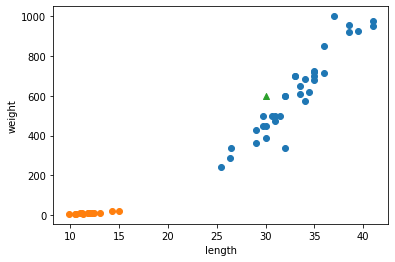

In [ ]:
# 데이터 예측
plt.scatter(bream_length, bream_weight) # scatter : 산점도
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
# datatype 이 리스트로 묶여있으니까 입력데이터도 대괄호로 묶어주어야 한다. 이때는 훈련을 시킬때의 데이터 타입을 맞추어서 2차원으로 지정해야한다.
# KN데이터를 넣었을 때 처럼 맞추어서 해야한다.[[]]
KN.predict([[30, 600]])

# 검증 결과 도미로 예츠, 정답 도미 => 잘 된거임

array([1])

### 1.6 K-NN 단점
- 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살핌
- 데이터가 많아야지만 정확도가 올라감
- 데이터 크기가 커지면 메모리 많이 필요, 직선거리 계산에도 많은 시간 소요


binary Classification, multi Classification
- K값을 정하고 분류할 데이터와 가장 가까운 데이터 K개를 꼽는다.
- 가장 가까운 것 중에 다수결로 꼽는다.
- 거리는 유클리드 거리로 정한다.(최단거리)
- x_train : 학습에 필요한 특징을 가진 데이터(1 개체의 특징들은 한개의 자료형으로 묶여있어야 한다. => 리스트)
- x_test : 정답 데이터, 특징 데이터가 주어졌을 때 모델이 맞추어야하는 정답

In [ ]:
# 이런 입력데이터를 가지고 있다.
# 모델 자체가 실제로 학습을 하는 것이 아니고, 데이터를 가지고 있다.
print(KN._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    9.8]
 [  10.5   10.5]
 [  10.6   10.6]
 [  11.    11. ]
 [  11.2   11.2]
 [  11.3   11.3]
 [  11.8   11.8]
 [  11.8   11.8]
 [  12.    12. ]
 [  12.2   12.2]
 [  12.4   12.4]
 [  13.    13. ]
 [  14.3   14.3]
 [  15.    15. ]]


In [ ]:
# 정답데이터를 가지고 있다.

print(KN._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# K의 값을 49로 잡는다.
# 이건 투표 단계에서 다 비교하겠다는 의미인데..
# 이렇게 한다면 데이터가 더 많은 쪽으로 무조건 분류된다.
KN49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
# 뭐.. 그래도 일단은 학습시키자
KN49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [ ]:
# K 값이 너무 큰 경우에 발생하는 문제
# K값을 늘린 정확도, 정확도가 확 떨어짐.
# 도미가 데이터 수가 많기 때문에 항상 도미로 나오게된다.
# 따라서 K의 값이 너무 커서는 안된다.
KN49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
# 모든 데이터를 도미로 분류하고 있다.
print(35/49)

0.7142857142857143


### K-NN 이웃 분석 방법

K : 비교할 개체의 개수

ex) K = 3

근접하는 K개의 개체를 비교하고, 가장 많은 수의 개체가 있는 것으로 분류한다.

x_train : 특징(길이 , 무게)  |  x_test : test dataset